In [2]:
!pip install scanpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached natsort-8.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached session_info-1.0.1-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.8 MB/s  0:00:00 eta 0:00:01
Using cached natsort-8.4.0-py3-none-any.whl (38 kB)
Using cached session_info-1.0.1-py3-none-any.whl (9.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [scanpy]2m7/8 [scanpy]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [1]:
import scanpy as sc
adata = sc.read_h5ad("RNA_scaled_crispr_screen_20240615.h5ad")
adata


AnnData object with n_obs × n_vars = 2206191 × 209
    obs: 'fov', 'x', 'y', 'global_x', 'global_y', 'area', 'batch', 'cell_type', 'cluster_type', 'singlet_name', 'singlet_gene', 'bc3', 'bc1', 'n_thresh3', 'n_thresh1'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mean', 'std'
    uns: 'cell_type_colors', 'cluster_type_colors', 'log1p', 'neighbors', 'pca', 'pl112_counts', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_pca_orig', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [15]:
import scanpy as sc
import pandas as pd
import numpy as np

# ------------------------------------------------------------
# 2. Create sequential cell IDs
# ------------------------------------------------------------
n_cells = adata.n_obs
seq_ids = [f"Cell_{i:07d}" for i in range(n_cells)]

# ------------------------------------------------------------
# 3. Build matched_merfishcounttable_xy.csv
#    cell_id | X | Y | <genes...>
# ------------------------------------------------------------

# Expression matrix (dense)
X = adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X

counts_df = pd.DataFrame(
    X,
    columns=adata.var_names
)

counts_df.insert(0, "Y", adata.obs["global_y"].values)
counts_df.insert(0, "X", adata.obs["global_x"].values)
counts_df.insert(0, "cell_id", seq_ids)

counts_df.to_csv("matched_RNAcounttable_xy.csv", index=False)

counts_df

,cell_id,X,Y,Pck1,Alas1,Sardh,Insig1,Cyp1a2,Herpud1,Hnf4a,...,Lox,Pdcd1,Ccl2,Mmrn1,Ms4a1,Il2ra,Ctla4,Klrb1,Csf2,Cdh11
0,Cell_0000000,-2.720315e+03,5.288400e+03,1.489728,-0.882063,-0.982538,-0.586037,-0.889175,-0.718430,-0.690389,...,-0.183307,-0.099137,-0.129469,-0.158465,-0.118263,-0.094393,-0.107852,-0.110067,-0.089430,-0.470875
1,Cell_0000001,5.843990e+03,5.577075e+03,-1.335743,-0.889909,-0.983311,-0.591068,0.711974,-0.717843,-0.692471,...,-0.187358,-0.101388,-0.131544,-0.160336,-0.121077,-0.096993,11.486401,-0.111981,-0.091021,-0.479589
2,Cell_0000002,-4.031937e+03,7.263273e+03,-0.374859,-0.869158,1.772094,-0.576732,-0.888358,0.704942,-0.685520,...,-0.177594,-0.096048,-0.126682,-0.155635,-0.114314,-0.090814,-0.103774,-0.107331,-0.087182,-0.458680
3,Cell_0000003,-1.570483e+03,2.084277e+03,0.051692,0.902380,-0.932048,-0.534754,-0.836656,-0.670206,-0.650146,...,-0.175323,-0.096272,-0.127956,-0.151212,-0.113081,-0.090880,-0.103310,-0.105593,-0.086203,-0.455435
4,Cell_0000004,1.765691e+03,7.085616e+03,-1.318698,3.240888,-0.941848,3.622222,-0.854194,-0.683742,-0.653340,...,-0.164494,-0.089876,-0.121787,-0.147073,-0.105471,-0.083542,-0.095148,-0.100648,-0.081973,-0.431723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206186,Cell_2206186,9.977057e+05,1.004583e+06,-1.296800,-0.866010,-0.924097,-0.551661,0.588915,-0.654813,-0.652434,...,-0.197189,-0.108808,-0.139790,-0.160431,-0.128360,-0.105308,-0.119487,-0.115748,-0.094767,-0.502897
2206187,Cell_2206187,9.957111e+05,9.938763e+05,-0.146868,-0.937850,-1.103915,-0.670888,0.908810,0.006762,0.145317,...,-0.166928,-0.086047,3.657686,-0.159961,-0.105959,-0.079793,-0.092787,-0.104118,-0.083231,0.801813
2206188,Cell_2206188,1.004848e+06,1.000168e+06,-1.326440,1.434781,1.716456,-0.586545,-0.870388,-0.703536,-0.685394,...,-0.192835,-0.104860,-0.135053,-0.161891,-0.124981,-0.100947,-0.115109,-0.114376,-0.093146,-0.491843
2206189,Cell_2206189,9.933370e+05,9.947056e+05,-0.116186,0.159150,0.170685,-0.313806,0.488245,0.167282,-0.893100,...,-0.206049,-0.090176,-0.105692,-0.218005,-0.129047,-0.086851,-0.107150,-0.130481,-0.099620,-0.085292


In [76]:
# ------------------------------------------------------------
# 4. Build tumorpooledperturbations.csv
#    rows = perturbations
#    cols = cells
#    values = 0 / 1
# ------------------------------------------------------------

# Clean perturbation labels
pert_series = adata.obs["singlet_gene"].astype(str)

# Fix ALL control encodings
# pert_series = pert_series.replace({
#     "nan": "Control",
#     "": "Control",
#     "None": "Control",
#     "NA": "Control",
# })


# One-hot encode as integers (0/1)
pert_matrix = pd.get_dummies(pert_series, dtype=int)

# Transpose: rows = perturbations, cols = cells
pert_matrix = pert_matrix.T

# Assign SAME sequential IDs as columns
pert_matrix.columns = seq_ids

# Put Control first (optional but recommended)
if "control" in pert_matrix.index:
    new_order = ["control"] + [r for r in pert_matrix.index if r != "control"]
    pert_matrix = pert_matrix.loc[new_order]

pert_matrix.to_csv("RNAperturbations.csv")
pert_matrix

,Cell_0000000,Cell_0000001,Cell_0000002,Cell_0000003,Cell_0000004,Cell_0000005,Cell_0000006,Cell_0000007,Cell_0000008,Cell_0000009,...,Cell_2206181,Cell_2206182,Cell_2206183,Cell_2206184,Cell_2206185,Cell_2206186,Cell_2206187,Cell_2206188,Cell_2206189,Cell_2206190
control,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
A1bg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aars,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vhl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Xbp1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yipf5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zfp830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# ------------------------------------------------------------
# 5. Sanity checks (do not skip)
# ------------------------------------------------------------

# 0/1 only
assert set(np.unique(pert_matrix.values)) <= {0, 1}

# Exactly one perturbation per cell
assert (pert_matrix.sum(axis=0) == 1).all()

# IDs aligned across files
assert list(counts_df["cell_id"]) == list(pert_matrix.columns)

print("All sanity checks passed ✅")


All sanity checks passed ✅


In [18]:
adata.obs[["x", "y", "global_x", "global_y"]].describe()

,x,y,global_x,global_y
count,2.206191e+06,2.206191e+06,2.206191e+06,2.206191e+06
mean,4.992003e+02,2.260109e+03,5.052902e+05,5.070511e+05
std,5.690979e+03,4.732312e+03,3.173108e+05,3.177731e+05
min,-1.737064e+04,-1.038862e+04,-5.015198e+03,-2.017220e+02
25%,-3.062659e+03,-1.230888e+03,2.069752e+05,2.116055e+05
50%,6.353988e+02,2.652512e+03,4.962288e+05,4.996808e+05
75%,4.523199e+03,5.716082e+03,7.969581e+05,8.046066e+05
max,1.316115e+04,1.495834e+04,1.009370e+06,1.006560e+06


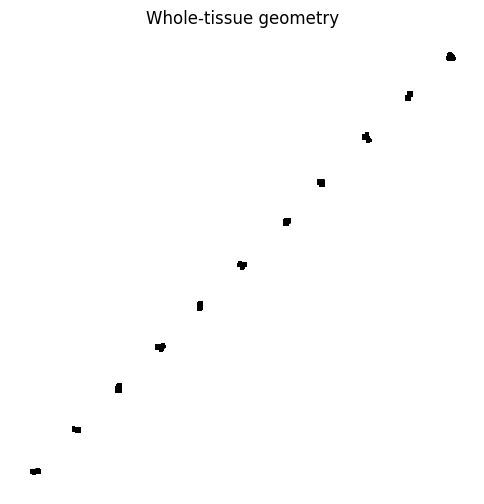

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(
    adata.obs["global_x"],
    adata.obs["global_y"],
    s=0.2,
    c="black",
    rasterized=True
)
plt.axis("equal")
plt.axis("off")
plt.title("Whole-tissue geometry")
plt.show()


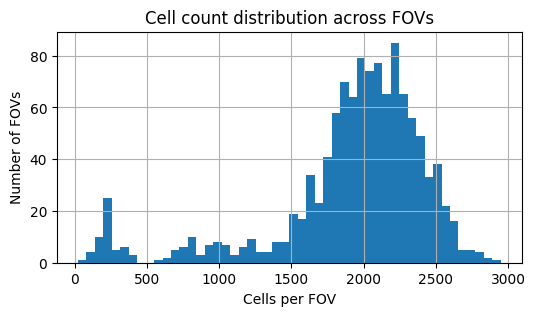

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
adata.obs["fov"].value_counts().hist(bins=50)
plt.xlabel("Cells per FOV")
plt.ylabel("Number of FOVs")
plt.title("Cell count distribution across FOVs")
plt.show()


In [20]:
fov = adata.obs["fov"].value_counts().idxmax()
sub = adata[adata.obs["fov"] == fov]

In [21]:
adata[adata.obs["fov"] == fov]

View of AnnData object with n_obs × n_vars = 2948 × 209
    obs: 'fov', 'x', 'y', 'global_x', 'global_y', 'area', 'batch', 'cell_type', 'cluster_type', 'singlet_name', 'singlet_gene', 'bc3', 'bc1', 'n_thresh3', 'n_thresh1'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mean', 'std'
    uns: 'cluster_type_colors', 'log1p', 'neighbors', 'pca', 'pl112_counts', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_pca_orig', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

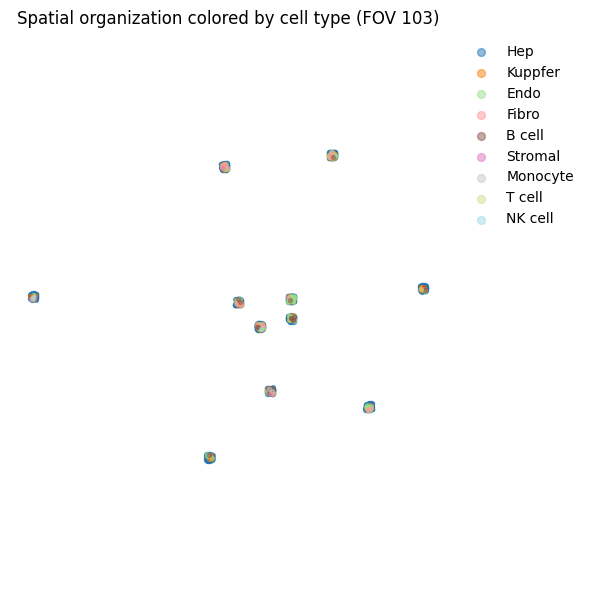

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sub = adata[adata.obs["fov"] == fov].copy()

plot_df = sub.obs[["x", "y", "cell_type"]].copy()
plot_df["cell_type"] = plot_df["cell_type"].astype(str)

cell_types = plot_df["cell_type"].unique()
palette = plt.cm.tab20(np.linspace(0, 1, len(cell_types)))

color_map = dict(zip(cell_types, palette))

plt.figure(figsize=(6, 6))

for ct in cell_types:
    df_ct = plot_df[plot_df["cell_type"] == ct]
    plt.scatter(
        df_ct["x"],
        df_ct["y"],
        s=8,            # bigger
        alpha=0.5,      # more transparent
        color=color_map[ct],
        label=ct,
        rasterized=True
    )

plt.gca().invert_yaxis()
plt.axis("equal")
plt.axis("off")
plt.title(f"Spatial organization colored by cell type (FOV {fov})")

plt.legend(
    markerscale=2,
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False
)

plt.tight_layout()
plt.show()


In [78]:
sub.obs

,fov,x,y,global_x,global_y,area,batch,cell_type,cluster_type,singlet_name,singlet_gene,bc3,bc1,n_thresh3,n_thresh1
id,,,,,,,,,,,,,,,
100534048959200201687014117353243420076,103,-3038.321230,1474.371319,-3038.321230,1474.371319,247.231226,0,Hep,Hep3,,,,Rngtt,0,1
1006439487449792838397376520945437688,103,-3156.402244,1212.172780,-3156.402244,1212.172780,247.850117,0,Hep,Hep6,,,,"Crnkl1,Rngtt",0,2
101385645235637152242793170003655104049,103,-3162.258805,1458.935892,-3162.258805,1458.935892,171.445620,0,Hep,Hep2,,,,,0,0
10187169670577954061434348071572931361,103,-2931.477635,1443.321014,-2931.477635,1443.321014,100.871830,0,Hep,Hep1,,,,,0,0
101980163523940768235901406708098948611,103,-3032.419666,1435.580708,-3032.419666,1435.580708,261.098578,0,Hep,Hep3,,,,"Sars,Crnkl1",0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92203680878344970437717648426210650400,103,-6474.948770,-5221.518641,993525.051230,994778.481359,87.492922,10,Hep,Hep6,,,,,0,0
93943314992067305908747126403760596411,103,-6433.105460,-5026.021322,993566.894540,994973.978678,304.835493,10,Hep,Hep1,,,,Rptor,0,1
95682463629428304043989351751005575035,103,-6282.722174,-5147.739851,993717.277826,994852.260149,421.720936,10,Hep,Hep6,,,,"Rpl38,Atp6v0c,Apoa2",0,3


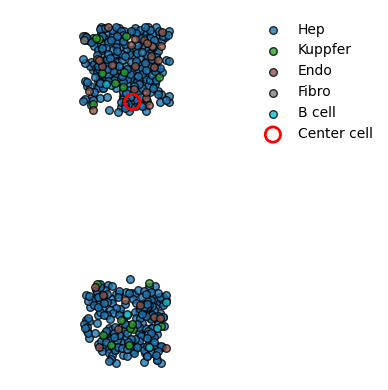

In [ ]:
# Use the same sub (single FOV) you already created
sub = adata[adata.obs["fov"] == fov].copy()

# Inspect a few rows
sub.obs[["x", "y", "cell_type"]].head()

center_idx = sub.obs.index[0]   # you can change this

cx = sub.obs.loc[center_idx, "x"]
cy = sub.obs.loc[center_idx, "y"]

window = 1000  # microns

zoom_df = sub.obs[
    (sub.obs["x"] >= cx - window) & (sub.obs["x"] <= cx + window) &
    (sub.obs["y"] >= cy - window) & (sub.obs["y"] <= cy + window)
].copy()

import numpy as np
import matplotlib.pyplot as plt

cell_types = zoom_df["cell_type"].unique()
palette = plt.cm.tab10(np.linspace(0, 1, len(cell_types)))
color_map = dict(zip(cell_types, palette))

plt.figure(figsize=(4, 4))

for ct in cell_types:
    df_ct = zoom_df[zoom_df["cell_type"] == ct]
    plt.scatter(
        df_ct["x"],
        df_ct["y"],
        s=30,            # MUCH larger dots
        alpha=0.8,
        color=color_map[ct],
        label=ct,
        edgecolor="black"
    )

# highlight the center cell
plt.scatter(
    cx, cy,
    s=120,
    facecolors="none",
    edgecolors="red",
    linewidths=2,
    label="Center cell"
)

plt.gca().invert_yaxis()
plt.axis("equal")
plt.axis("off")
plt.title(f"Zoom-in view (±{window} µm) — FOV {fov}")

plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False
)

plt.tight_layout()
plt.show()


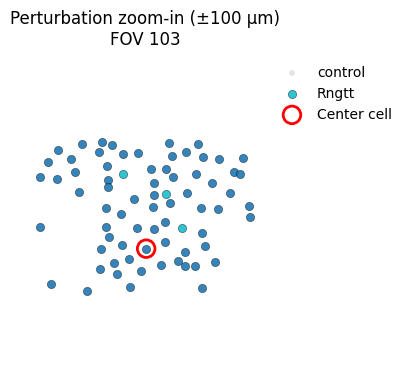

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------------
# 1. Prepare perturbation labels
# --------------------------------------------------
zoom_df["perturbation"] = (
    zoom_df["singlet_gene"]
    .astype(str)
)

# --------------------------------------------------
# 2. Identify perturbations (exclude Control)
# --------------------------------------------------
perts = sorted(p for p in zoom_df["perturbation"].unique() if p != "control")

# Color map: Control = grey, perturbations = tab10
palette = plt.cm.tab10(np.linspace(0, 1, len(perts)))
color_map = dict(zip(perts, palette))
color_map["control"] = "lightgrey"

# --------------------------------------------------
# 3. Plot
# --------------------------------------------------
plt.figure(figsize=(4, 4))

# Plot control cells first (background)
df_ctrl = zoom_df[zoom_df["perturbation"] == "control"]
plt.scatter(
    df_ctrl["x"],
    df_ctrl["y"],
    s=18,
    alpha=0.6,
    color="lightgrey",
    edgecolor="none",
    label="control"
)

# Plot perturbed cells on top
for p in perts:
    df_p = zoom_df[zoom_df["perturbation"] == p]
    plt.scatter(
        df_p["x"],
        df_p["y"],
        s=35,
        alpha=0.9,
        color=color_map[p],
        edgecolor="black",
        linewidth=0.3,
        label=p
    )

# Highlight center cell
plt.scatter(
    cx, cy,
    s=160,
    facecolors="none",
    edgecolors="red",
    linewidths=2,
    label="Center cell"
)

# --------------------------------------------------
# 4. Formatting
# --------------------------------------------------
plt.gca().invert_yaxis()
plt.axis("equal")
plt.axis("off")

plt.title(f"Perturbation zoom-in (±{window} µm)\nFOV {fov}")

plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False
)

plt.tight_layout()
plt.show()


In [80]:
adata.obs["singlet_gene"].value_counts().head(20)

singlet_gene
           2127012
control       4161
Nubp1         2084
Tbcb          1840
Ccdc84        1805
Dut           1783
Rpl38         1351
Rngtt         1256
Lgr4          1241
Hnrnpu        1191
Ddx20         1164
Npc1          1143
Pmpcb         1118
Sbno1         1039
Gpn1          1023
Atp6ap1        988
Dnm2           950
Acvr1          944
Jtb            927
Polr1a         900
Name: count, dtype: int64

/Users/juliachen/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/Users/juliachen/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_simple.py:385: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/var/folders/df/6ly7fyfn1ds6r9brqjdcjjn00000gn/T/ipykernel_88314/1649369676.py:64: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  pert = adata_b.obs["singlet_gene"].replace({


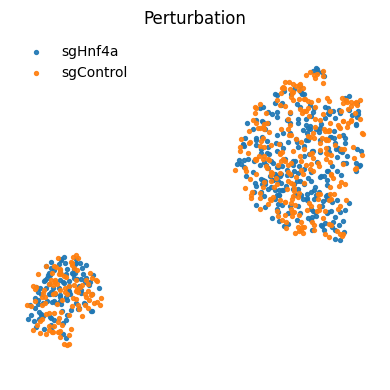

In [3]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Subsample control to match Hnf4a
# --------------------------------------------------
is_hnf = adata.obs["singlet_gene"] == "Hnf4a"
is_ctrl = adata.obs["singlet_gene"] == "control"

n_hnf = is_hnf.sum()

np.random.seed(0)
ctrl_idx = np.random.choice(
    adata.obs.index[is_ctrl],
    size=n_hnf,
    replace=False
)

keep_idx = np.concatenate([
    adata.obs.index[is_hnf],
    ctrl_idx
])

adata_b = adata[keep_idx].copy()

# --------------------------------------------------
# 2. NORMALIZATION 
# --------------------------------------------------
sc.pp.normalize_total(adata_b, target_sum=1e4)
sc.pp.log1p(adata_b)

# --------------------------------------------------
# FIX NaNs properly 
# --------------------------------------------------

# Use raw counts proxy from total_counts + mean/std
# Instead of guessing, rebuild expression matrix safely

X = adata_b.X.copy()

# Convert sparse → dense if needed
from scipy import sparse
if sparse.issparse(X):
    X = X.toarray()

# Replace NaNs with 0 (safe after log-normalization)
X[np.isnan(X)] = 0

adata_b.X = X

# --------------------------------------------------
# 3. UMAP pipeline
# --------------------------------------------------
sc.pp.pca(adata_b, n_comps=30)
sc.pp.neighbors(adata_b, n_neighbors=15)
sc.tl.umap(adata_b)

# --------------------------------------------------
# 4. Plot: Perturbation (LEFT panel B)
# --------------------------------------------------
umap = adata_b.obsm["X_umap"]

pert = adata_b.obs["singlet_gene"].replace({
    "Hnf4a": "sgHnf4a",
    "control": "sgControl"
})

colors = {
    "sgHnf4a": "#1f77b4",
    "sgControl": "#ff7f0e"
}

plt.figure(figsize=(4, 4))
for p in ["sgHnf4a", "sgControl"]:
    idx = pert == p
    plt.scatter(
        umap[idx, 0],
        umap[idx, 1],
        s=8,
        alpha=0.9,
        color=colors[p],
        label=p
    )

plt.axis("off")
plt.axis("equal")
plt.legend(frameon=False)
plt.title("Perturbation")
plt.tight_layout()
plt.show()


/var/folders/df/6ly7fyfn1ds6r9brqjdcjjn00000gn/T/ipykernel_97980/2568981704.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  pert = adata_b.obs["singlet_gene"].replace({


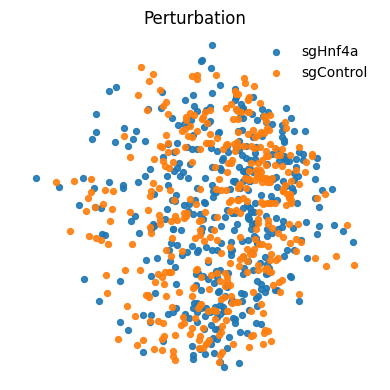

In [101]:
import matplotlib.pyplot as plt

umap = adata_b.obsm["X_umap"]

pert = adata_b.obs["singlet_gene"].replace({
    "Hnf4a": "sgHnf4a",
    "control": "sgControl"
})

colors = {
    "sgHnf4a": "#1f77b4",   # blue
    "sgControl": "#ff7f0e" # orange
}

plt.figure(figsize=(4, 4))

for p in ["sgHnf4a", "sgControl"]:
    idx = pert == p
    plt.scatter(
        umap[idx, 0],
        umap[idx, 1],
        s=18,
        alpha=0.9,
        color=colors[p],
        label=p
    )

plt.axis("off")
plt.axis("equal")
plt.legend(frameon=False)
plt.title("Perturbation")
plt.tight_layout()
plt.show()


In [ ]:
[v for v in adata_b.var_names]

['Pck1',
 'Alas1',
 'Sardh',
 'Insig1',
 'Cyp1a2',
 'Herpud1',
 'Hnf4a',
 'Proz',
 'Cxcl12',
 'G6pc',
 'Xbp1',
 'Gcgr',
 'Abcc3',
 'Rorc',
 'Hc',
 'Serpina3n',
 'Ppara',
 'Ldlr',
 'Hmgcr',
 'Idh1',
 'Aldh3a2',
 'Hhex',
 'Gch1',
 'Lsr',
 'Hsd17b6',
 'Aars',
 'Gstm1',
 'B2m',
 'Fech',
 'Fdps',
 'Pdia4',
 'Ndufc2',
 'Cd1d1',
 'Hyou1',
 'Cyp2c38',
 'Srebf1',
 'Ctsc',
 'Gpd1',
 'Fgf1',
 'Ctnnb1',
 'Hsbp1',
 'Insr',
 'Aldh1b1',
 'Maob',
 'Nfkbia',
 'Manf',
 'Krt18',
 'Slc25a37',
 'Dnajb11',
 'Il15ra',
 'Abcb4',
 'Cd47',
 'Psmc5',
 'Ifitm3',
 'Cyp17a1',
 'Pdha1',
 'Hsd3b3',
 'Tmem56',
 'Sqle',
 'Dnajb9',
 'Cxadr',
 'Psmb1',
 'Irf3',
 'Irf7',
 'Hspe1',
 'Sdf2l1',
 'Atf4',
 'Notch2',
 'Gpi1',
 'Minpp1',
 'Tpr',
 'Sgms2',
 'Arsb',
 'Ep300',
 'Cbr4',
 'Dhfr',
 'Ddit3',
 'Ptges2',
 'Gsdmd',
 'Rpp14',
 'Eif3a',
 'Tap1',
 'Mertk',
 'Mvd',
 'Nfkb1',
 'Tox',
 'Axin2',
 'Tfrc',
 'Parp14',
 'Srd5a1',
 'Isg15',
 'Icam1',
 'Shisa5',
 'Wars',
 'Dut',
 'Il18',
 'Gca',
 'Myc',
 'Rrm2',
 'Egr1',
 'Ifit3',
 'C

In [12]:
import numpy as np
import pandas as pd

# genes to plot (example)
genes = adata.var_names

# split control vs perturbations
is_ctrl = adata.obs["singlet_gene"] == "control"

# mean expression in control
ctrl_mean = adata[is_ctrl, genes].X.mean(axis=0)
ctrl_mean = np.asarray(ctrl_mean).ravel() + 1e-6

# mean expression per perturbation
rna_rows = []
pert_names = []

for g in adata.obs["singlet_gene"].unique():
    if g == "control":
        continue
    idx = adata.obs["singlet_gene"] == g
    if idx.sum() < 10:
        continue

    mean_expr = adata[idx, genes].X.mean(axis=0)
    mean_expr = np.asarray(mean_expr).ravel() + 1e-6

    log2fc = np.log2(mean_expr / ctrl_mean)
    rna_rows.append(log2fc)
    pert_names.append(g)

rna_mat = pd.DataFrame(rna_rows, index=pert_names, columns=genes)

img_feats = ["area", "x", "y"]  # replace with real imaging features

img_rows = []
for g in rna_mat.index:
    idx = adata.obs["singlet_gene"] == g
    vals = adata.obs.loc[idx, img_feats].mean(axis=0)
    img_rows.append(vals)

img_mat = pd.DataFrame(img_rows, index=rna_mat.index)

# Z-score across perturbations
img_mat = (img_mat - img_mat.mean()) / img_mat.std()


/var/folders/df/6ly7fyfn1ds6r9brqjdcjjn00000gn/T/ipykernel_88314/1571420844.py:28: RuntimeWarning: invalid value encountered in log2
  log2fc = np.log2(mean_expr / ctrl_mean)


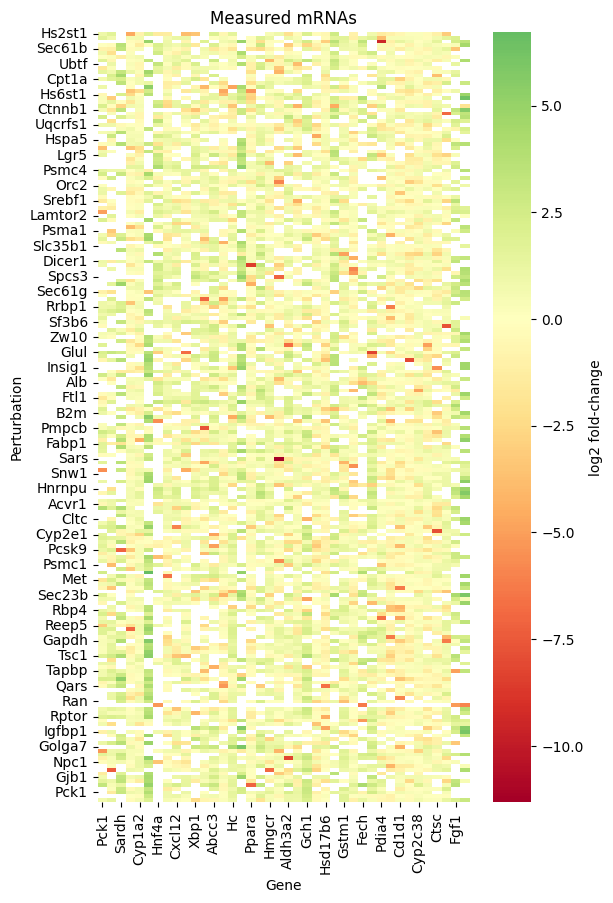

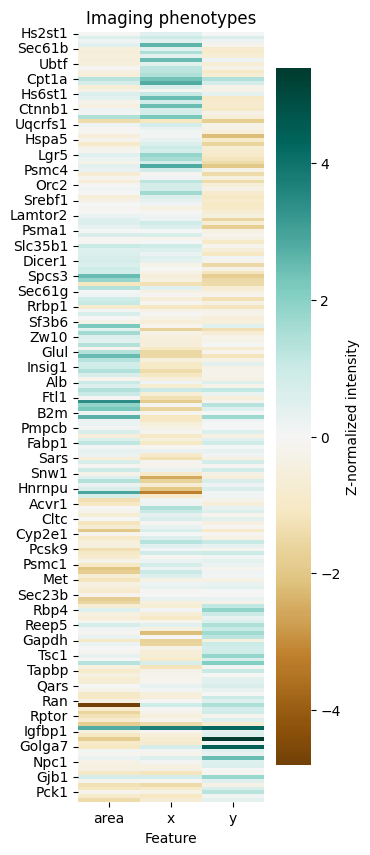

In [ ]:
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# correlation matrices
rna_corr = rna_mat.T.corr()
img_corr = img_mat.T.corr()

joint_corr = (rna_corr + img_corr) / 2

# 1. Force symmetry
joint_corr = (joint_corr + joint_corr.T) / 2

# 2. Convert to distance
dist = 1 - joint_corr

# 3. Clean numerical issues
dist = dist.fillna(0.0)
np.fill_diagonal(dist.values, 0.0)

# 4. Convert to condensed distance
condensed = squareform(dist.values, checks=True)

# 5. Hierarchical clustering
Z = linkage(condensed, method="average")
order = leaves_list(Z)

ordered_perts = joint_corr.index[order]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 10))
sns.heatmap(
    rna_mat.loc[ordered_perts, genes[:40]],
    cmap="RdYlGn",
    center=0,
    cbar_kws={"label": "log2 fold-change"}
)
plt.title("Measured mRNAs")
plt.ylabel("Perturbation")
plt.xlabel("Gene")
plt.show()

plt.figure(figsize=(3, 10))
sns.heatmap(
    img_mat.loc[ordered_perts],
    cmap="BrBG",
    center=0,
    cbar_kws={"label": "Z-normalized intensity"}
)
plt.title("Imaging phenotypes")
plt.ylabel("")
plt.xlabel("Feature")
plt.show()


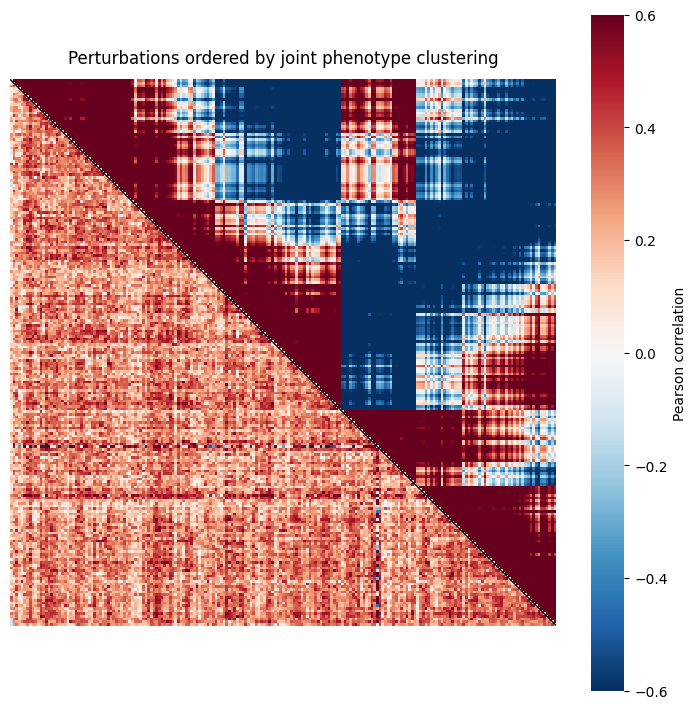

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# rna_mat: (perturbation x RNA features)   index = singlet_gene
# img_mat: (perturbation x imaging feats) index = singlet_gene

# -----------------------------
# 1) Correlations across perturbations
# -----------------------------
seq_corr = rna_mat.T.corr(method="pearson")  # sequencing phenotype corr
img_corr = img_mat.T.corr(method="pearson")  # imaging phenotype corr

# Align indices (important)
common = seq_corr.index.intersection(img_corr.index)
seq_corr = seq_corr.loc[common, common]
img_corr = img_corr.loc[common, common]

# -----------------------------
# 2) Joint clustering order (average correlation)
# -----------------------------
joint = (seq_corr + img_corr) / 2
joint = joint.replace([np.inf, -np.inf], np.nan).fillna(0)
joint = (joint + joint.T) / 2
np.fill_diagonal(joint.values, 1.0)

dist = 1 - joint
np.fill_diagonal(dist.values, 0.0)
condensed = squareform(dist.values, checks=False)

Z = linkage(condensed, method="average")
order = leaves_list(Z)

seq_ord = seq_corr.iloc[order, order].replace([np.inf, -np.inf], np.nan).fillna(0)
img_ord = img_corr.iloc[order, order].replace([np.inf, -np.inf], np.nan).fillna(0)

# enforce symmetry (for numerical stability)
seq_ord = (seq_ord + seq_ord.T) / 2
img_ord = (img_ord + img_ord.T) / 2
np.fill_diagonal(seq_ord.values, 1.0)
np.fill_diagonal(img_ord.values, 1.0)

# -----------------------------
# 3) Build Panel D matrix:
#    below diag = sequencing, above diag = imaging
# -----------------------------
n = len(seq_ord)
panel = np.zeros((n, n), dtype=float)

i_lower = np.tril_indices(n, k=-1)
i_upper = np.triu_indices(n, k=+1)

panel[i_lower] = seq_ord.values[i_lower]
panel[i_upper] = img_ord.values[i_upper]
np.fill_diagonal(panel, 0.0)  # paper usually draws diagonal as boundary; keep neutral

# -----------------------------
# 4) Plot
# -----------------------------
plt.figure(figsize=(7.2, 7.2))
sns.heatmap(
    panel,
    cmap="RdBu_r",
    center=0,
    vmin=-0.6, vmax=0.6,
    square=True,
    xticklabels=False, yticklabels=False,
    cbar_kws={"label": "Pearson correlation"}
)

plt.title("Perturbations ordered by joint phenotype clustering", pad=12)

# Optional: draw diagonal boundary line
plt.plot([0, n], [0, n], color="black", linewidth=1)

plt.tight_layout()
plt.show()